<a href="https://www.kaggle.com/code/stefansanchez26/bank-customer-churn-prediction?scriptVersionId=164139287" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import os
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("dark")
sns.set_palette("viridis")
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


<div id="1" style="background-color: #1a1a1a; padding: 10px; border-radius: 10px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #fff; font-weight: bold; font-size: 42px;">
    Dataset Overview
    </h1>
</div>

In [2]:
sample_data=pd.read_csv("/kaggle/input/playground-series-s4e1/sample_submission.csv")
train_data=pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv",index_col="id")
test_data=pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv",index_col="id")

In [3]:
orig_data = pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv",index_col = "RowNumber")
orig_data.dropna(inplace=True)
train_data = pd.concat([train_data,orig_data])
train_data.reset_index(drop=True,inplace=True)

In [4]:
sample_data.head()

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


In [5]:
train_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [6]:
test_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,,,
165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [7]:
print("train shappe: ", train_data.shape, "test shape: ", test_data.shape)

train shappe:  (175032, 13) test shape:  (110023, 12)


In [8]:
train_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.750320e+05,175032.000000,175032.000000,175032.000000,175032.000000,175032.000000,175032.000000,175032.000000,175032.000000,175032.000000
mean,1.569194e+07,656.115945,38.171265,5.019933,56677.821792,1.553070,0.751188,0.498743,111862.236392,0.211156
std,7.142820e+04,81.149591,8.969537,2.811133,62982.219148,0.549211,0.432326,0.500000,50815.188500,0.408130
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563288e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,73214.330000,0.000000
50%,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,116969.730000,0.000000
75%,1.575666e+07,710.000000,42.000000,7.000000,120727.970000,2.000000,1.000000,1.000000,154767.340000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [9]:
train_data.Exited.value_counts()

Exited
0    138073
1     36959
Name: count, dtype: int64

<div id="1" style="background-color: #1a1a1a; padding: 10px; border-radius: 10px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #fff; font-weight: bold; font-size: 42px;">
    Exploratory Data Analysis
    </h1>
</div>

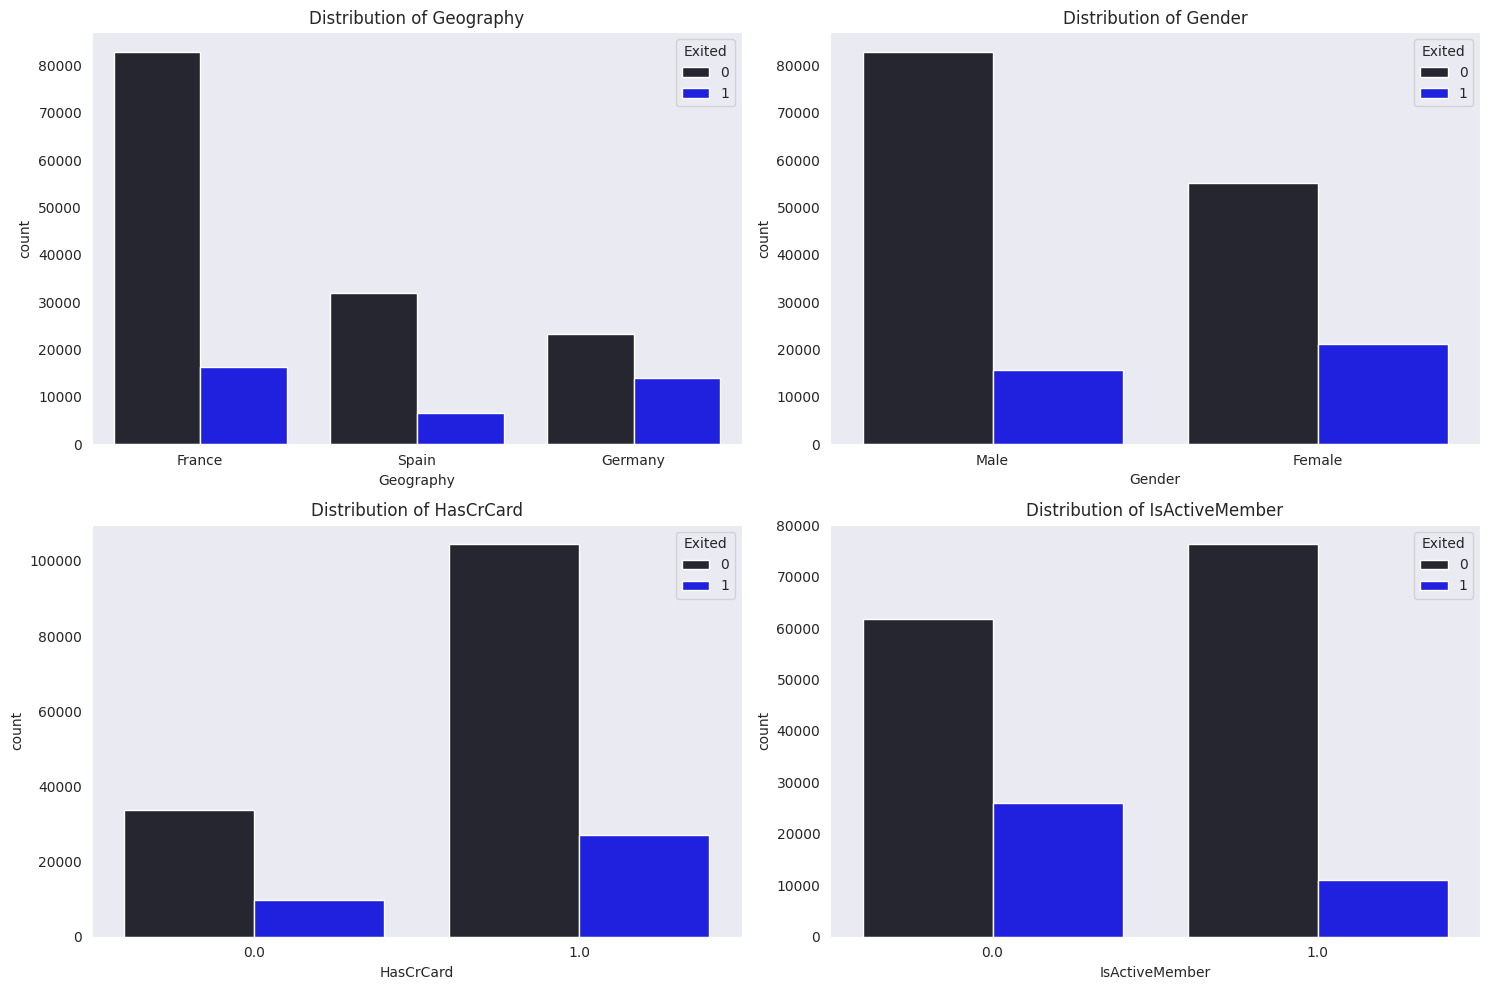

In [10]:
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
sns.dark_palette("#69d", reverse=True, as_cmap=True)
# rows of subplots
num_rows = len(categorical_columns) // 2 + len(categorical_columns) % 2

plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, 2, i)
    sns.countplot(data=train_data, x=column, hue='Exited', palette='dark:blue') 
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

<div id="1" style="background-color: #1a1a1a; padding: 10px; border-radius: 10px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #fff; font-weight: bold; font-size: 42px;">
    Preprocessing the Data
    </h1>
</div>

In [11]:
train_data['Mem__no__Products'] = train_data['NumOfProducts'] * train_data['IsActiveMember']
train_data['Balance_Salary_Ratio'] = train_data['Balance'] / train_data['EstimatedSalary']
train_data['Balance_Age_Ratio'] = train_data['Balance'] / train_data['Age']


test_data['Mem__no__Products'] = test_data['NumOfProducts'] * test_data['IsActiveMember']
test_data['Balance_Salary_Ratio'] = test_data['Balance'] / test_data['EstimatedSalary']
test_data['Balance_Age_Ratio'] = test_data['Balance'] / test_data['Age']


In [12]:
label_enc = LabelEncoder()

train_data["Gender"] = label_enc.fit_transform(train_data[["Gender"]])
test_data["Gender"] = label_enc.transform(test_data[["Gender"]])
train_data["Geography"] = label_enc.fit_transform(train_data[["Geography"]])
test_data["Geography"] = label_enc.transform(test_data[["Geography"]])
train_data["Surname"] = label_enc.fit_transform(train_data[["Surname"]])
test_data["Surname"] = label_enc.transform(test_data[["Surname"]])

train_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Mem__no__Products,Balance_Salary_Ratio,Balance_Age_Ratio
0,15674932,2023,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0,0.0,0.000000,0.000000
1,15749177,2024,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0,2.0,0.000000,0.000000
2,15694510,1236,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0,0.0,0.000000,0.000000
3,15741417,1362,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1.0,1.760655,4378.898235
4,15766172,491,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,2.0,0.000000,0.000000


<div id="1" style="background-color: #1a1a1a; padding: 10px; border-radius: 10px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #fff; font-weight: bold; font-size: 42px;">
    Models
    </h1>
</div>

In [13]:
X_train=train_data.drop('Exited', axis=1)
y_train=train_data["Exited"]

In [14]:
# def find_best_rf_parameters(X, y, param_grid, cv=5):
#     """
#     Find the best parameters for a Random Forest Classifier using Grid Search.

#     Parameters:
#     - X: Features
#     - y: Target variable
#     - param_grid: Dictionary with hyperparameter values to search
#     - cv: Number of cross-validation folds

#     Returns:
#     - Best parameters for the Random Forest Classifier
#     """

#     # Split the data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     # Create a Random Forest Classifier
#     rf_classifier = RandomForestClassifier()

#     # Use Grid Search to find the best parameters
#     grid_search = GridSearchCV(rf_classifier, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
#     grid_search.fit(X_train, y_train)

#     # Print the best parameters and their corresponding accuracy
#     print("Best Parameters: ", grid_search.best_params_)
#     print("Best AUC: {:.2f}%".format(grid_search.best_score_ * 100))

#     # Evaluate the model on the test set
#     test_accuracy = grid_search.best_estimator_.score(X_test, y_test)
#     print("Test Set AUC: {:.2f}%".format(test_accuracy * 100))

#     return grid_search.best_params_




In [15]:
# param_grid = {'n_estimators': [200, 150, 230, 250, 300], 'max_depth': [5, 10, 15], 'min_samples_split': [4, 5, 6, 7]}
# best_params = find_best_rf_parameters(X_train, y_train, param_grid)

In [16]:

# def find_best_rf_parameters(X, y, param_distributions, n_iter=10, cv=5):
#     """
#     Find the best parameters for a Random Forest Classifier using Randomized Search.

#     Parameters:
#     - X: Features
#     - y: Target variable
#     - param_distributions: Dictionary with hyperparameter distributions to search
#     - n_iter: Number of parameter settings that are sampled
#     - cv: Number of cross-validation folds

#     Returns:
#     - Best parameters for the Random Forest Classifier
#     """

#     # Split the data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     # Create a Random Forest Classifier
#     rf_classifier = RandomForestClassifier()

#     # Use Randomized Search to find the best parameters
#     randomized_search = RandomizedSearchCV(rf_classifier, param_distributions, n_iter=n_iter, cv=cv, scoring='roc_auc', n_jobs=-1, random_state=42)
#     randomized_search.fit(X_train, y_train)

#     # Print the best parameters and their corresponding accuracy
#     print("Best Parameters: ", randomized_search.best_params_)
#     print("Best AUC: {:.2f}%".format(randomized_search.best_score_ * 100))

#     # Evaluate the model on the test set
#     test_accuracy = randomized_search.best_estimator_.score(X_test, y_test)
#     print("Test Set AUC: {:.2f}%".format(test_accuracy * 100))

#     return randomized_search.best_params_


In [17]:
# param_distributions = {'n_estimators': [10, 200, 250, 300], 'max_depth': [5, 10, 15, 20], 'min_samples_split': [4, 5, 6, 7], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
# best_params = find_best_rf_parameters(X_train, y_train, param_distributions)

In [18]:
# def find_best_lgbm_parameters(X, y, param_distributions, n_iter=10, cv=5):
#     """
#     Find the best parameters for a LightGBM Classifier using Randomized Search.

#     Parameters:
#     - X: Features
#     - y: Target variable
#     - param_distributions: Dictionary with hyperparameter distributions to search
#     - n_iter: Number of parameter settings that are sampled
#     - cv: Number of cross-validation folds

#     Returns:
#     - Best parameters for the LightGBM Classifier
#     """

#     # Split the data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     # Create a LightGBM Classifier
#     lgbm_classifier = LGBMClassifier()

#     # Use Randomized Search to find the best parameters
#     randomized_search = RandomizedSearchCV(lgbm_classifier, param_distributions, n_iter=n_iter, cv=cv, scoring='roc_auc', n_jobs=-1, random_state=42)
#     randomized_search.fit(X_train, y_train)

#     # Print the best parameters and their corresponding accuracy
#     print("Best Parameters: ", randomized_search.best_params_)
#     print("Best AUC: {:.2f}%".format(randomized_search.best_score_ * 100))

#     # Evaluate the model on the test set
#     test_accuracy = randomized_search.best_estimator_.score(X_test, y_test)
#     print("Test Set AUC: {:.2f}%".format(test_accuracy * 100))

#     return randomized_search.best_params_


In [19]:
# # Define parameter distributions for LightGBM
# lgbm_param_distributions = {
#     'num_leaves': [20, 30, 40, 50],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'max_depth': [-1, 10, 20, 30],
#     'min_child_samples': [10, 20, 30, 40],
#     'subsample': [0.8, 0.9, 1.0],
# }

# # Call the function
# best_lgbm_params = find_best_lgbm_parameters(X_train, y_train, lgbm_param_distributions, n_iter=10, cv=5)

In [20]:
# Best Parameters:  {'subsample': 0.9, 'num_leaves': 30, 'min_child_samples': 40, 'max_depth': 30, 'learning_rate': 0.1}
# Best AUC: 88.95%
# Test Set AUC: 86.62%

In [21]:
# def find_best_xgboost_parameters(X, y, param_distributions, n_iter=10, cv=5):
#     """
#     Find the best parameters for an XGBoost Classifier using Randomized Search.

#     Parameters:
#     - X: Features
#     - y: Target variable
#     - param_distributions: Dictionary with hyperparameter distributions to search
#     - n_iter: Number of parameter settings that are sampled
#     - cv: Number of cross-validation folds

#     Returns:
#     - Best parameters for the XGBoost Classifier
#     """

#     # Split the data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     # Create an XGBoost Classifier
#     xgb_classifier = XGBClassifier()

#     # Use Randomized Search to find the best parameters
#     randomized_search = RandomizedSearchCV(xgb_classifier, param_distributions, n_iter=n_iter, cv=cv, scoring='roc_auc', n_jobs=-1, random_state=42)
#     randomized_search.fit(X_train, y_train)

#     # Print the best parameters and their corresponding accuracy
#     print("Best Parameters: ", randomized_search.best_params_)
#     print("Best AUC: {:.2f}%".format(randomized_search.best_score_ * 100))

#     # Evaluate the model on the test set
#     test_accuracy = randomized_search.best_estimator_.score(X_test, y_test)
#     print("Test Set AUC: {:.2f}%".format(test_accuracy * 100))

#     return randomized_search.best_params_


In [22]:
# # Define parameter distributions for XGBoost
# xgboost_param_distributions = {
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'max_depth': [3, 5, 7, 10],
#     'subsample': [0.8, 0.9, 1.0],
#     'min_child_weight': [1, 5, 10],
#     'gamma': [0, 0.1, 0.2, 0.3],
# }

# # Call the function
# best_xgboost_params = find_best_xgboost_parameters(X_train, y_train, xgboost_param_distributions, n_iter=10, cv=5)

In [23]:
# Best Parameters:  {'subsample': 0.9, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0}
# Best AUC: 88.94%
# Test Set AUC: 86.64%

In [24]:
# def find_best_catboost_parameters(X, y, param_distributions, n_iter=10, cv=5):
#     """
#     Find the best parameters for a CatBoost Classifier using Randomized Search.

#     Parameters:
#     - X: Features
#     - y: Target variable
#     - param_distributions: Dictionary with hyperparameter distributions to search
#     - n_iter: Number of parameter settings that are sampled
#     - cv: Number of cross-validation folds

#     Returns:
#     - Best parameters for the CatBoost Classifier
#     """

#     # Split the data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     # Create a CatBoost Classifier
#     catboost_classifier = CatBoostClassifier()

#     # Use Randomized Search to find the best parameters
#     randomized_search = RandomizedSearchCV(catboost_classifier, param_distributions, n_iter=n_iter, cv=cv, scoring='roc_auc', n_jobs=-1, random_state=42)
#     randomized_search.fit(X_train, y_train)

#     # Print the best parameters and their corresponding accuracy
#     print("Best Parameters: ", randomized_search.best_params_)
#     print("Best AUC: {:.2f}%".format(randomized_search.best_score_ * 100))

#     # Evaluate the model on the test set
#     test_accuracy = randomized_search.best_estimator_.score(X_test, y_test)
#     print("Test Set AUC: {:.2f}%".format(test_accuracy * 100))

#     return randomized_search.best_params_


In [25]:
# # Define parameter distributions for CatBoost
# catboost_param_distributions = {
#     'depth': [4, 6, 8, 10],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'l2_leaf_reg': [1, 3, 5, 7, 9],
#     'subsample': [0.8, 0.9, 1.0],
# }

# # Call the function
# best_catboost_params = find_best_catboost_parameters(X_train, y_train, catboost_param_distributions, n_iter=10, cv=5)

In [26]:
# Best Parameters:  {'subsample': 0.8, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'depth': 4}
# Best AUC: 89.03%
# Test Set AUC: 86.73%

In [27]:
saved_params_catboost = {'subsample': 0.8, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'depth': 4}
saved_params_xgboost = {'subsample': 0.9, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0}
saved_params_lgbm = {'subsample': 0.9, 'num_leaves': 30, 'min_child_samples': 40, 'max_depth': 30, 'learning_rate': 0.1}

In [28]:
catboost_best = CatBoostClassifier(**saved_params_catboost)
catboost_best.fit(X=X_train, y=y_train)

xgboost_best = XGBClassifier(**saved_params_xgboost)
xgboost_best.fit(X=X_train, y=y_train)

lgbm_best = LGBMClassifier(**saved_params_lgbm)
lgbm_best.fit(X=X_train, y=y_train)

0:	learn: 0.6108124	total: 78.5ms	remaining: 1m 18s
1:	learn: 0.5493513	total: 106ms	remaining: 52.8s
2:	learn: 0.5042169	total: 132ms	remaining: 43.9s
3:	learn: 0.4693577	total: 157ms	remaining: 39s
4:	learn: 0.4437576	total: 182ms	remaining: 36.2s
5:	learn: 0.4250184	total: 205ms	remaining: 34s
6:	learn: 0.4093183	total: 229ms	remaining: 32.5s
7:	learn: 0.3992305	total: 250ms	remaining: 31s
8:	learn: 0.3890542	total: 272ms	remaining: 30s
9:	learn: 0.3801899	total: 297ms	remaining: 29.5s
10:	learn: 0.3725379	total: 322ms	remaining: 29s
11:	learn: 0.3670508	total: 343ms	remaining: 28.3s
12:	learn: 0.3621121	total: 368ms	remaining: 27.9s
13:	learn: 0.3590724	total: 386ms	remaining: 27.2s
14:	learn: 0.3552183	total: 407ms	remaining: 26.7s
15:	learn: 0.3517263	total: 428ms	remaining: 26.3s
16:	learn: 0.3496795	total: 446ms	remaining: 25.8s
17:	learn: 0.3475248	total: 471ms	remaining: 25.7s
18:	learn: 0.3453259	total: 489ms	remaining: 25.3s
19:	learn: 0.3440667	total: 510ms	remaining: 25s


LGBMClassifier(max_depth=30, min_child_samples=40, num_leaves=30, subsample=0.9)

In [29]:
test_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Mem__no__Products,Balance_Salary_Ratio,Balance_Age_Ratio
id,,,,,,,,,,,,,,,
165034,15773898,1607,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75,2.0,0.000000,0.000000
165035,15782418,1966,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27,0.0,0.000000,0.000000
165036,15807120,1351,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09,0.0,0.000000,0.000000
165037,15808905,1986,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57,0.0,0.000000,0.000000
165038,15607314,1172,752,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00,0.0,0.869703,3191.147895


In [30]:
# # Create a VotingClassifier with the three XGBoost models
voting = VotingClassifier(estimators=[
    ('Model1', lgbm_best),
    ('Model2', xgboost_best),
    ('Model3', catboost_best)
], voting='soft', weights = [0.5, 0.3, 0.2])

voting.fit(X_train, y_train)

predictions = voting.predict_proba(test_data)[:, 1]
predict = voting.predict(test_data)


0:	learn: 0.6108124	total: 21ms	remaining: 21s
1:	learn: 0.5493513	total: 44.2ms	remaining: 22.1s
2:	learn: 0.5042169	total: 67ms	remaining: 22.3s
3:	learn: 0.4693577	total: 92ms	remaining: 22.9s
4:	learn: 0.4437576	total: 116ms	remaining: 23.2s
5:	learn: 0.4250184	total: 139ms	remaining: 23.1s
6:	learn: 0.4093183	total: 160ms	remaining: 22.7s
7:	learn: 0.3992305	total: 179ms	remaining: 22.2s
8:	learn: 0.3890542	total: 200ms	remaining: 22s
9:	learn: 0.3801899	total: 222ms	remaining: 21.9s
10:	learn: 0.3725379	total: 243ms	remaining: 21.8s
11:	learn: 0.3670508	total: 262ms	remaining: 21.6s
12:	learn: 0.3621121	total: 284ms	remaining: 21.5s
13:	learn: 0.3590724	total: 311ms	remaining: 21.9s
14:	learn: 0.3552183	total: 337ms	remaining: 22.1s
15:	learn: 0.3517263	total: 362ms	remaining: 22.3s
16:	learn: 0.3496795	total: 392ms	remaining: 22.6s
17:	learn: 0.3475248	total: 417ms	remaining: 22.7s
18:	learn: 0.3453259	total: 443ms	remaining: 22.9s
19:	learn: 0.3440667	total: 465ms	remaining: 22

In [31]:
sample_data['Exited'] = predictions
sample_data.to_csv('submission.csv', index=False)

In [32]:
sample_data.head()

,id,Exited
0,165034,0.026885
1,165035,0.839819
2,165036,0.028050
3,165037,0.224480
4,165038,0.392475
